In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
file_path = 'BMI.csv'
bmi_data = pd.read_csv(file_path)

# Prepare the data
X = bmi_data.drop('fatpctg', axis=1)
y = bmi_data['fatpctg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Backward elimination using RFE
lin_reg = LinearRegression()
rfe_backward = RFE(estimator=lin_reg, n_features_to_select=1)
rfe_backward.fit(X_train, y_train)
ranking_backward = pd.Series(rfe_backward.ranking_, index=X.columns).sort_values()

# Forward selection using RFE
rfe_forward = RFE(estimator=lin_reg, n_features_to_select=1, step=1)
rfe_forward.fit(X_train, y_train)
ranking_forward = pd.Series(rfe_forward.ranking_, index=X.columns).sort_values()


In [5]:
# Correlation with output
correlation = X.apply(lambda x: x.corr(y))
correlation_ranking = correlation.abs().sort_values(ascending=False)


In [6]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# Random forest (feature importance ranking)
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)


In [7]:
results = {
    "Backward Elimination Ranking": ranking_backward,
    "Forward Selection Ranking": ranking_forward,
    "Correlation Ranking": correlation_ranking,
    "Lasso Coefficients": lasso_coef,
    "Random Forest Importances": rf_importances
}


C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


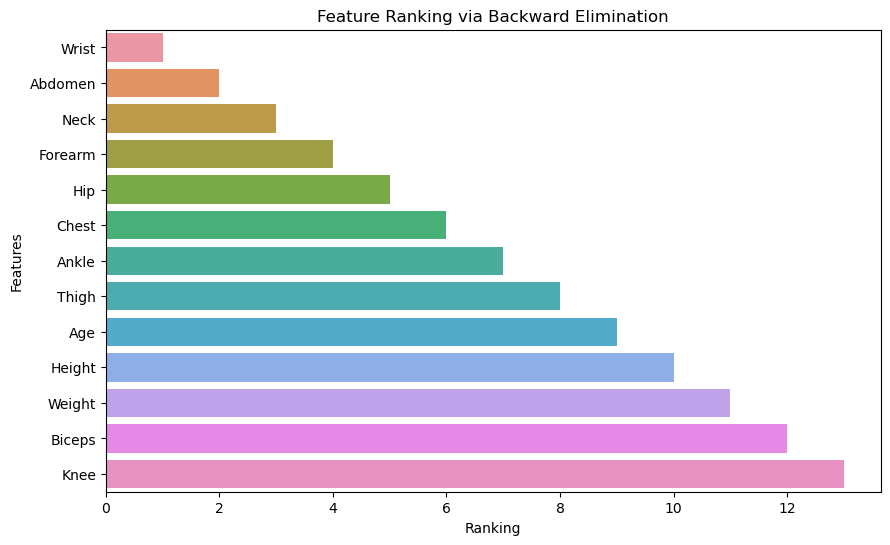

C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


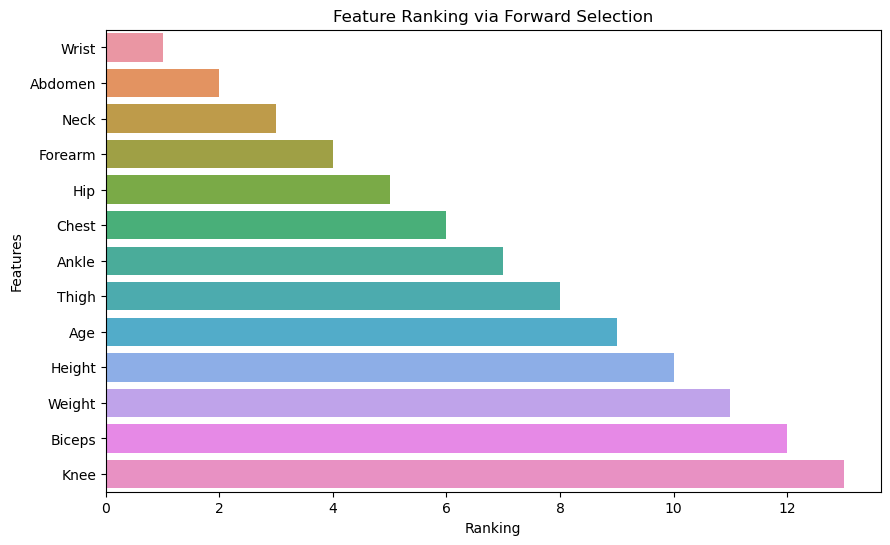

C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


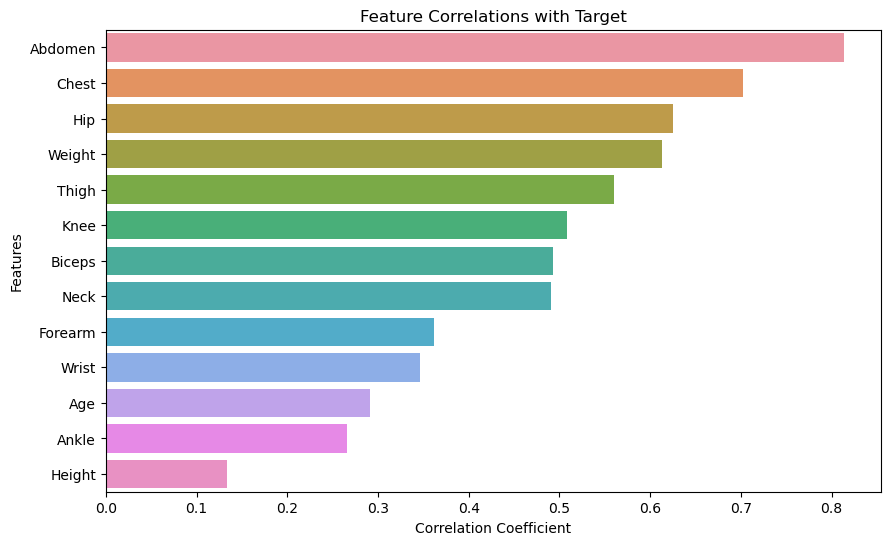

C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


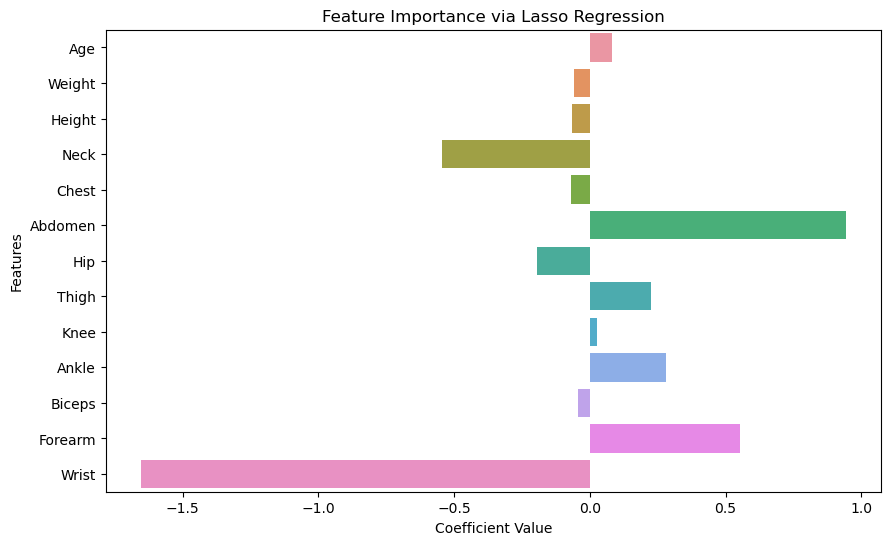

C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


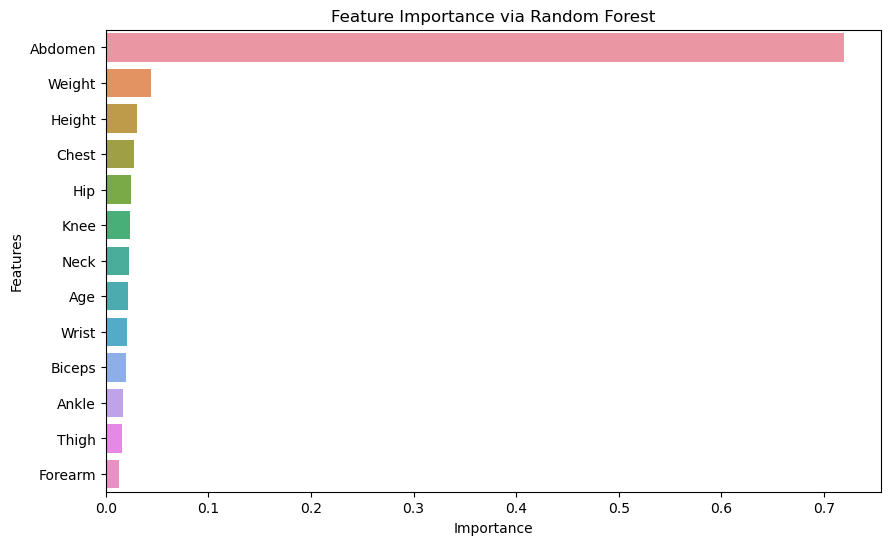

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'BMI.csv'  # Update this with the actual file path
bmi_data = pd.read_csv(file_path)

# Prepare the data
X = bmi_data.drop('fatpctg', axis=1)
y = bmi_data['fatpctg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Wrapper Method: Backward and Forward Stepwise Regression
# Backward elimination using RFE
lin_reg = LinearRegression()
rfe_backward = RFE(estimator=lin_reg, n_features_to_select=1)
rfe_backward.fit(X_train, y_train)
ranking_backward = pd.Series(rfe_backward.ranking_, index=X.columns).sort_values()

# Forward selection using RFE
rfe_forward = RFE(estimator=lin_reg, n_features_to_select=1, step=1)
rfe_forward.fit(X_train, y_train)
ranking_forward = pd.Series(rfe_forward.ranking_, index=X.columns).sort_values()

# Plotting feature rankings from backward elimination
plt.figure(figsize=(10, 6))
sns.barplot(x=ranking_backward.values, y=ranking_backward.index)
plt.title('Feature Ranking via Backward Elimination')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()

# Plotting feature rankings from forward selection
plt.figure(figsize=(10, 6))
sns.barplot(x=ranking_forward.values, y=ranking_forward.index)
plt.title('Feature Ranking via Forward Selection')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()

# Filter Method: Correlation Statistics
correlation = X.apply(lambda x: x.corr(y))
correlation_ranking = correlation.abs().sort_values(ascending=False)

# Plotting feature correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_ranking.values, y=correlation_ranking.index)
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Embedded Method
# (1) Lasso regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# Plotting Lasso coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=lasso_coef.values, y=lasso_coef.index)
plt.title('Feature Importance via Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# (2) Random forest (feature importance ranking)
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting Random Forest feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title('Feature Importance via Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
